In [1]:
#标准方程法_岭回归

In [2]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [3]:
#读入数据
data = genfromtxt("longley.csv",delimiter = ',')
print(data)

[[  83.     234.289  235.6    159.     107.608 1947.      60.323]
 [  88.5    259.426  232.5    145.6    108.632 1948.      61.122]
 [  88.2    258.054  368.2    161.6    109.773 1949.      60.171]
 [  89.5    284.599  335.1    165.     110.929 1950.      61.187]
 [  96.2    328.975  209.9    309.9    112.075 1951.      63.221]
 [  98.1    346.999  193.2    359.4    113.27  1952.      63.639]
 [  99.     365.385  187.     354.7    115.094 1953.      64.989]
 [ 100.     363.112  357.8    335.     116.219 1954.      63.761]
 [ 101.2    397.469  290.4    304.8    117.388 1955.      66.019]
 [ 104.6    419.18   282.2    285.7    118.734 1956.      67.857]
 [ 108.4    442.769  293.6    279.8    120.445 1957.      68.169]
 [ 110.8    444.546  468.1    263.7    121.95  1958.      66.513]
 [ 112.6    482.704  381.3    255.2    123.366 1959.      68.655]
 [ 114.2    502.601  393.1    251.4    125.368 1960.      69.564]
 [ 115.7    518.173  480.6    257.2    127.852 1961.      69.331]
 [ 116.9  

In [4]:
#切分数据
x_data = data[:,1:]
y_data = data[:,0,np.newaxis]
print(x_data)
print(y_data)

[[ 234.289  235.6    159.     107.608 1947.      60.323]
 [ 259.426  232.5    145.6    108.632 1948.      61.122]
 [ 258.054  368.2    161.6    109.773 1949.      60.171]
 [ 284.599  335.1    165.     110.929 1950.      61.187]
 [ 328.975  209.9    309.9    112.075 1951.      63.221]
 [ 346.999  193.2    359.4    113.27  1952.      63.639]
 [ 365.385  187.     354.7    115.094 1953.      64.989]
 [ 363.112  357.8    335.     116.219 1954.      63.761]
 [ 397.469  290.4    304.8    117.388 1955.      66.019]
 [ 419.18   282.2    285.7    118.734 1956.      67.857]
 [ 442.769  293.6    279.8    120.445 1957.      68.169]
 [ 444.546  468.1    263.7    121.95  1958.      66.513]
 [ 482.704  381.3    255.2    123.366 1959.      68.655]
 [ 502.601  393.1    251.4    125.368 1960.      69.564]
 [ 518.173  480.6    257.2    127.852 1961.      69.331]
 [ 554.894  400.7    282.7    130.081 1962.      70.551]]
[[ 83. ]
 [ 88.5]
 [ 88.2]
 [ 89.5]
 [ 96.2]
 [ 98.1]
 [ 99. ]
 [100. ]
 [101.2]
 [104.

In [5]:
print(np.mat(x_data).shape)
print(np.mat(y_data).shape)
#给样本添加偏置项
X_data = np.concatenate((np.ones((16,1)),x_data),axis=1)
print(X_data.shape)

(16, 6)
(16, 1)
(16, 7)


In [6]:
#标准方程法_岭回归求解回归参数
def weights(xArr,yArr,lam=0.2):
    #lam表示岭回归系数
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    xTx = xMat.T * xMat
    #np.eye(xMat.shape[1])表示创建单位矩阵
    rxTx = xTx + np.eye(xMat.shape[1]) * lam
    #计算矩阵的值，如果为0，说明没有逆矩阵
    if np.linalg.det(rxTx) == 0.0:
        print("This matrix cannot do inverse")
        return
    #xTx.I为xTx的逆矩阵
    ws = rxTx.I * xMat.T * yMat
    return ws

In [7]:
ws = weights(X_data,y_data)
print(ws)

[[ 7.38107538e-04]
 [ 2.07703836e-01]
 [ 2.10076376e-02]
 [ 5.05385441e-03]
 [-1.59173066e+00]
 [ 1.10442920e-01]
 [-2.42280461e-01]]


In [8]:
#计算预测值
np.mat(X_data) * np.mat(ws)

matrix([[ 83.55075226],
        [ 86.92588689],
        [ 88.09720228],
        [ 90.95677622],
        [ 96.06951002],
        [ 97.81955375],
        [ 98.36444357],
        [ 99.99814266],
        [103.26832266],
        [105.03165135],
        [107.45224671],
        [109.52190685],
        [112.91863666],
        [113.98357055],
        [115.29845063],
        [117.64279933]])

In [ ]:
# sklearn_岭回归

In [10]:
import numpy as np
from numpy import genfromtxt
from sklearn import linear_model
import matplotlib.pyplot as plt

In [11]:
#读入数据
data = genfromtxt("longley.csv",delimiter = ',')
print(data)

[[  83.     234.289  235.6    159.     107.608 1947.      60.323]
 [  88.5    259.426  232.5    145.6    108.632 1948.      61.122]
 [  88.2    258.054  368.2    161.6    109.773 1949.      60.171]
 [  89.5    284.599  335.1    165.     110.929 1950.      61.187]
 [  96.2    328.975  209.9    309.9    112.075 1951.      63.221]
 [  98.1    346.999  193.2    359.4    113.27  1952.      63.639]
 [  99.     365.385  187.     354.7    115.094 1953.      64.989]
 [ 100.     363.112  357.8    335.     116.219 1954.      63.761]
 [ 101.2    397.469  290.4    304.8    117.388 1955.      66.019]
 [ 104.6    419.18   282.2    285.7    118.734 1956.      67.857]
 [ 108.4    442.769  293.6    279.8    120.445 1957.      68.169]
 [ 110.8    444.546  468.1    263.7    121.95  1958.      66.513]
 [ 112.6    482.704  381.3    255.2    123.366 1959.      68.655]
 [ 114.2    502.601  393.1    251.4    125.368 1960.      69.564]
 [ 115.7    518.173  480.6    257.2    127.852 1961.      69.331]
 [ 116.9  

In [12]:
#切分数据
x_data = data[:,1:]
y_data = data[:,0]
print(x_data)
print(y_data)

[[ 234.289  235.6    159.     107.608 1947.      60.323]
 [ 259.426  232.5    145.6    108.632 1948.      61.122]
 [ 258.054  368.2    161.6    109.773 1949.      60.171]
 [ 284.599  335.1    165.     110.929 1950.      61.187]
 [ 328.975  209.9    309.9    112.075 1951.      63.221]
 [ 346.999  193.2    359.4    113.27  1952.      63.639]
 [ 365.385  187.     354.7    115.094 1953.      64.989]
 [ 363.112  357.8    335.     116.219 1954.      63.761]
 [ 397.469  290.4    304.8    117.388 1955.      66.019]
 [ 419.18   282.2    285.7    118.734 1956.      67.857]
 [ 442.769  293.6    279.8    120.445 1957.      68.169]
 [ 444.546  468.1    263.7    121.95  1958.      66.513]
 [ 482.704  381.3    255.2    123.366 1959.      68.655]
 [ 502.601  393.1    251.4    125.368 1960.      69.564]
 [ 518.173  480.6    257.2    127.852 1961.      69.331]
 [ 554.894  400.7    282.7    130.081 1962.      70.551]]
[ 83.   88.5  88.2  89.5  96.2  98.1  99.  100.  101.2 104.6 108.4 110.8
 112.6 114.2 1

In [13]:
#创建模型
#生成100个岭回归系数测试值
alphas_to_test = np.linspace(0.001,1,100)
#创建模型，保存误差值
#Ridge代表岭回归
#CV 代表交叉验证法
model = linear_model.RidgeCV(alphas = alphas_to_test , store_cv_values=True)
model.fit(x_data,y_data)

#岭系数
print(model.alpha_)
#loss值
print(model.cv_values_.shape)


0.4046363636363637
(16, 100)


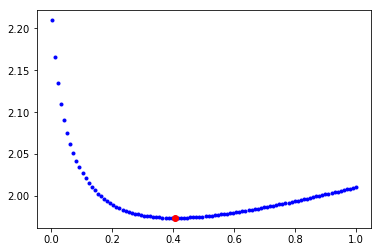

In [18]:
#画图
#岭系数跟loss值得关系
plt.plot(alphas_to_test,model.cv_values_.mean(axis=0),'b.')#mean表示平均值
plt.plot(model.alpha_,min(model.cv_values_.mean(axis=0)),'ro')
plt.show()

In [17]:
model.predict(x_data[3,np.newaxis])

array([90.84710758])